In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
A = pd.read_csv("/users/bajajvbh/Desktop/Vaibhav/Datasets/Credit.csv")

In [3]:
A.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
X = A.drop(labels=["Unnamed: 0","ID","Limit"],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = X.apply(le.fit_transform)
Y = A[["Limit"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=40)

# Unpruned_tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=20)
model = dtr.fit(xtrain,ytrain)
#Testing error
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytest,ts_pred)

199.28333333333333

In [9]:
#Training error
tr_pred = model.predict(xtrain)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(ytrain,tr_pred)

0.0

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(dtr,out_file="/users/bajajvbh/Desktop/dummy_work/dtr_10AM.out") #specify path where to export tree file

In [7]:
import matplotlib.pyplot as plt
plt.barh(X.columns,model.feature_importances_)

<BarContainer object of 10 artists>

# Pruning tree without using cross validation

In [8]:
max_d = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for i in max_d:
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(max_depth=i,random_state=20)
    model = dtr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    print("max depth : %d MAE : %.4f"%(i,mean_absolute_error(ytest,pred)))

max depth : 2 MAE : 697.3583
max depth : 3 MAE : 391.6679
max depth : 4 MAE : 241.2900
max depth : 5 MAE : 210.9268
max depth : 6 MAE : 219.5638
max depth : 7 MAE : 222.7852
max depth : 8 MAE : 214.2649
max depth : 9 MAE : 233.0051
max depth : 10 MAE : 233.1332
max depth : 11 MAE : 225.1454
max depth : 12 MAE : 240.6278
max depth : 13 MAE : 236.3556
max depth : 14 MAE : 233.0417
max depth : 15 MAE : 229.8667
max depth : 16 MAE : 229.8667


In [9]:
mssp = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in mssp:
    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(min_samples_split=i,random_state=20)
    model = dtr.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    print("MSAS : %d MAE : %.4f"%(i,mean_absolute_error(ytest,pred)))

MSAS : 2 MAE : 229.8667
MSAS : 3 MAE : 237.1833
MSAS : 4 MAE : 232.0903
MSAS : 5 MAE : 234.7444
MSAS : 6 MAE : 231.2526
MSAS : 7 MAE : 238.2719
MSAS : 8 MAE : 235.8227
MSAS : 9 MAE : 236.6907
MSAS : 10 MAE : 225.1350
MSAS : 11 MAE : 228.0671
MSAS : 12 MAE : 224.9294
MSAS : 13 MAE : 226.9198
MSAS : 14 MAE : 228.7255
MSAS : 15 MAE : 243.0556
MSAS : 16 MAE : 243.0556
MSAS : 17 MAE : 241.4048
MSAS : 18 MAE : 253.8894
MSAS : 19 MAE : 251.5081
MSAS : 20 MAE : 249.7481


In [ ]:
Pruning tree using cross validation

In [84]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor(random_state=20)
tp = {"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}
cv = GridSearchCV(dt,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
md = cvmodel.best_params_['max_depth']
dtr1 = DecisionTreeRegressor(random_state=20,max_depth=md)
model = dtr1.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(ytest,pred))

284.5271124860763


In [85]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor(random_state=20)
tp = {"min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]}
cv = GridSearchCV(dt,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
md = cvmodel.best_params_['min_samples_split']
dtr1 = DecisionTreeRegressor(random_state=20,min_samples_split=md)
model = dtr1.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(ytest,pred))

270.7233961640212


In [16]:
import pandas as pd

In [31]:
A = pd.read_csv("/users/bajajvbh/Desktop/Vaibhav/Datasets/Cars93.csv")

In [32]:
A.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

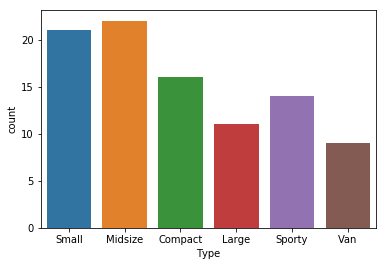

In [33]:
import seaborn as sb
sb.countplot(A.Type)

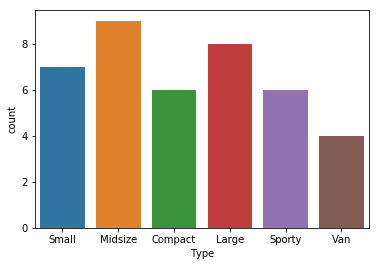

In [35]:
import seaborn as sb
sb.countplot(A[0:40].Type)

In [36]:
A = pd.read_csv("/users/bajajvbh/Desktop/Vaibhav/Datasets/iris.csv")

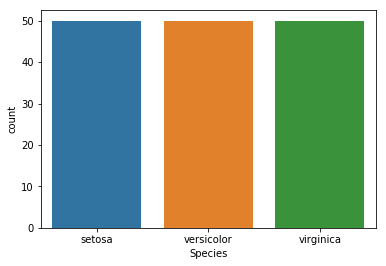

In [37]:
sb.countplot(A.Species)

In [29]:
A.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

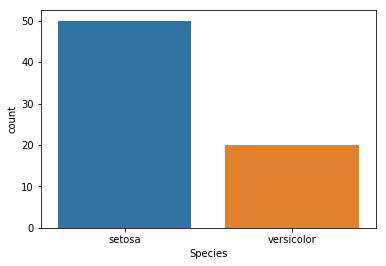

In [38]:
sb.countplot(A[0:70].Species)